# DATA 622  hw2

## Chunhui Zhu 

Assigned on September 27, 2018
Due on October 17, 2018 11:59 PM EST
15 points possible, worth 15% of your final grade

In this home work, I got some ideas to use random forest from the youtube video by 
Mike Bernico : https://www.youtube.com/watch?v=0GrciaGYzV0 ; 
Peter Begle : https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9 ;
Minisuk : https://www.youtube.com/watch?v=COUWKVf6zKY.

And I combine and apply differnt stratigies in the assignment. 

### Work Plan

Part I:Data Preparation

1. Load data csv. from github. Observe data set, understand the data types and check for missing data. 

2. Fill the missing data based on the relavance values in other columns.

3. Modify category data to numerical numbers representing their values at certain levels.

4. Adjust continous numerical data in some numbers which are representing their levels.

5. Use only numerical data to train machine learning models.

Part II:Train Machine Learning Models

6. Use cross validtaion break the train data into k folds, then sklearn build-in models to learn data:
a. KNN
b. Decision tree
c. Bayes
d. SVC
e. Gradient Boosting Regressor
f. RandomForestRegressor


7. steps for each ML model:
a. Build Random Forests by setting parameters
b. Fit train data in model
c. Get ROC values

Part III:Predition and Result

8. Pick the model which has the highest roc result to do prediction.


### Dictionary for train and test sets

survival : 1= yes, 0 = no
pclass: ticket class (1= 1st, 2=2nd, 3=3rd)
Sex: Sex
Age: Age in years
sibsp: #of siblings/spouses aboard 
parch: #of parents/children aboard
ticket: Ticket number
fare: passenger fare
cabin: cabin number
embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### System requirement 

In [1]:
#load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

import pickle
from scipy import misc
import glob


C:\Users\czhu5\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## PART I : Data Preperation

### Load data

#read data from url
gender_link="https://raw.githubusercontent.com/czhu505/Data-622-2-ML/master/HW2/gender_submission.csv"
test_link="https://raw.githubusercontent.com/czhu505/Data-622-2-ML/master/HW2/test.csv"
train_link="https://raw.githubusercontent.com/czhu505/Data-622-2-ML/master/HW2/train.csv"    


#gendre data set is for testing the prediction acuracy for machine learning algorithem prediction
gender=pd.read_csv(gender_link, index_col=0)
test=pd.read_csv(test_link,index_col=0)
train=pd.read_csv(train_link,index_col=0)

In [9]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

### Data Observation

1. The following steps to check how many missing data in the columns.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Training Data missing:
Age: 177
cabin:687
Embarked:2

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Data missing:
Age: 86
Fare:1
cabin:327

I am going to  fill the empty numerical data 'Age' into the data sets. 

2. Lookup the data informaton from the csv.

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


From the observation, train and test dataset both have missing data in 'Age' column.

Since 'Name' mix with title and name, I tried to use the column "Name" giving some infomation about the backgroung for missing age. 

The following steps combining train and test data sets. Before that, I need to remove 'Surviced' columne from the train data set. 

In [14]:
#To avoid to mess up with the orginal data set, I copy train to train1
train1=train
train_s=train1.pop('Survived')

In [15]:
full_data=pd.concat([train1,test], axis=0)
full_data=full_data.set_index(['PassengerId'])
full_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extract title from object 'Name'  

In [16]:
#Next setp is to extrac the title from 'Name' column. 
full_data['Title']=full_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [17]:
full_data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Jonkheer          1
Capt              1
Sir               1
the Countess      1
Don               1
Dona              1
Mme               1
Name: Title, dtype: int64

In [18]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [19]:
# map the normalized titles to the current titles 
full_data.Title = full_data.Title.map(normalized_titles)
# view value counts for the normalized titles
print(full_data.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [20]:
#replace all missing value with median of Age according to same Title 
# group by Sex, Pclass, and Title 
grouped = full_data.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

### Fill missing value for 'Age' 

In [21]:
#apply the grouped median value on the Age NaN
full_data.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

### Modify object 'Sex' 

In [22]:
#conver Sex into 0=male, 1=female
full_data['SexCode'] = full_data.Sex.map({"male": 0, "female":1})

### Extract first letter from object 'Ticket' 

In [23]:
#break down ticket object using first letter/number
full_data['TicketCode']=full_data['Ticket'].apply(lambda tick: tick[0])

In [24]:
#break down ticket object using first letter/number
full_data['TicketCode'].value_counts()

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: TicketCode, dtype: int64

In [25]:
#conver TicketCode into numeric number
full_data.TicketCode = full_data.TicketCode.map({"3": 3, "2":2, "1":1, "4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"S":101,"P":102,"C":103,"A":104,"W":105,"F":106,"L":107})

In [26]:
grouped = full_data.groupby(['TicketCode'])  
# view the median Age by the grouped features 
grouped.Fare.median()

TicketCode
1      53.10000
2      13.50000
3       7.89580
4       9.84170
5      16.10000
6      19.96670
7       9.22500
8       8.39790
9       7.75000
101     8.10415
102    79.20000
103    20.57500
104     8.05000
105    23.45000
106    21.00000
107     0.00000
Name: Fare, dtype: float64

### Fill missing value in 'Fare' 

In [27]:
full_data[full_data.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,SexCode,TicketCode
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,0,3


In [28]:
#filled the missing non using median with ticket starts number 3
#though it might not make sences, it won't be effect the result much since only 1 value missing
full_data['Fare']=full_data['Fare'].fillna(7.89580)

### Modify object 'Cabin'

In [29]:
#get the first letter from string, and palce none if the value is missing
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
full_data['CabinCode']=full_data.Cabin.apply(clean_cabin)

In [30]:
full_data.CabinCode.value_counts()

None    1014
C         94
B         65
D         46
E         41
A         22
F         21
G          5
T          1
Name: CabinCode, dtype: int64

In [31]:
#conver CabinCode into numeric number
full_data.CabinCode = full_data.CabinCode.map({"None": 0, "C":100, "B":101, "D":102,"E":103,"A":104,"F":105, "G":106, "T":107})

### Modify the object 'Embarked' 

Find and fill the missing value

In [32]:
full_data[full_data['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,SexCode,TicketCode,CabinCode
PassengerId,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,1,101
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,1,101


In [33]:
grouped=full_data[full_data['CabinCode']==101] 
grouped.Embarked.value_counts()

C    32
S    31
Name: Embarked, dtype: int64

In [34]:
#From the last result, these two missing value in Embarked either C or S, I randomly pick S.
full_data.Embarked=full_data['Embarked'].fillna('S')

In [35]:
full_data.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [36]:
#conver CabinCode into numeric number
full_data['EmbarkedCode'] = full_data.Embarked.map({"S": 0, "C":1, "Q":2 })

### Add familySize 

#family must be have 1 parent alive with their kids
full_data['FamilySize']=full_data['SibSp']+full_data['Parch']

### Overview table 

In [37]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Pclass          1309 non-null int64
Name            1309 non-null object
Sex             1309 non-null object
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Cabin           295 non-null object
Embarked        1309 non-null object
Title           1309 non-null object
SexCode         1309 non-null int64
TicketCode      1309 non-null int64
CabinCode       1309 non-null int64
EmbarkedCode    1309 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 163.6+ KB


So far, I have filled all the missing data, and using numerical numbers represent the category data in each object. 

1. We need to break the full_data into train and test data sets. 
2. remain only the numeric data in the data set

In [38]:
df=full_data._get_numeric_data()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass          1309 non-null int64
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Fare            1309 non-null float64
SexCode         1309 non-null int64
TicketCode      1309 non-null int64
CabinCode       1309 non-null int64
EmbarkedCode    1309 non-null int64
dtypes: float64(2), int64(7)
memory usage: 102.3 KB


In [40]:
trainSet=df.iloc[0:891,]
testSet=df.iloc[891:,]
#train_s has suvived column from tain data set
#gender has suvived column from test data set

### Ajust Age in some levels 

Observe survied and dead from train and decide levles at Age

In [41]:
#combine the survied column back to train data
train2=trainSet.assign(Survived=train_s.values)

In [42]:
train2.head(3)

,Pclass,Age,SibSp,Parch,Fare,SexCode,TicketCode,CabinCode,EmbarkedCode,Survived
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,104,0,0,0
2,1,38.0,1,0,71.2833,1,102,100,1,1
3,3,26.0,0,0,7.9250,1,101,0,0,1


C:\Users\czhu5\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


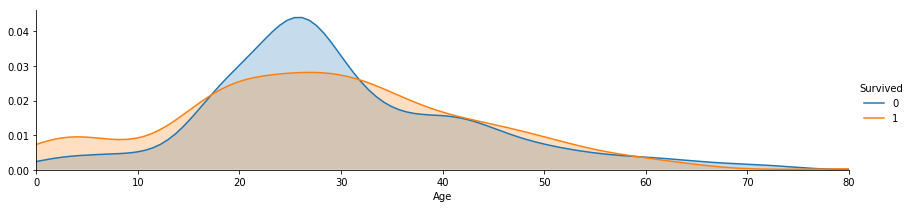

In [43]:
facet=sns.FacetGrid(train2, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0,train2['Age'].max()))
facet.add_legend()

plt.show()

The above graph shows the probability of survived and die.

In [44]:
df2=df
df2.Age=np.where(df2['Age'].between(0,17), 0, df2['Age'])
df2.Age=np.where(df2['Age'].between(17,32), 1, df2['Age'])
df2.Age=np.where(df2['Age'].between(32,41), 2, df2['Age'])
df2.Age=np.where(df2['Age'].between(41,100), 3, df2['Age'])

### Ajust Fare in some levels 

C:\Users\czhu5\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


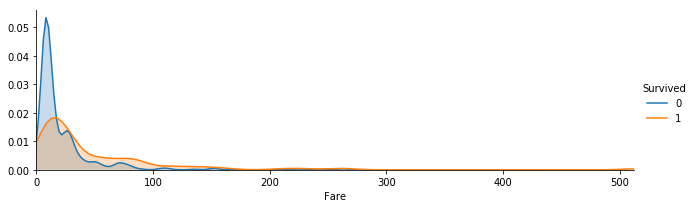

In [45]:
facet=sns.FacetGrid(train2, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train2['Fare'].max()))
facet.add_legend()

plt.show()

C:\Users\czhu5\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


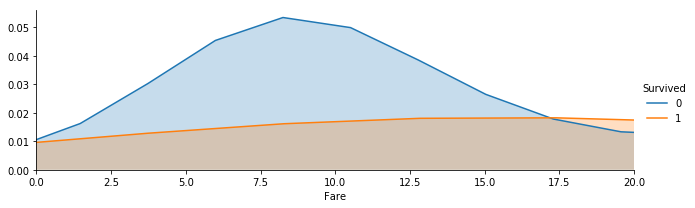

In [46]:
facet=sns.FacetGrid(train2, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train2['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

C:\Users\czhu5\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


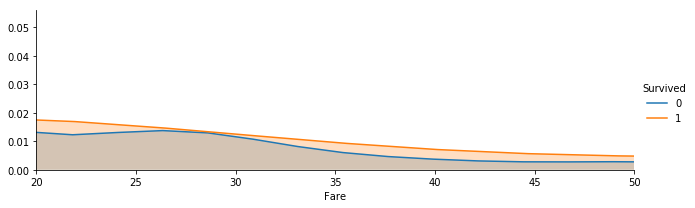

In [48]:
facet=sns.FacetGrid(train2, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train2['Fare'].max()))
facet.add_legend()
plt.xlim(20,50)
plt.show()

In [49]:
df2.Fare=np.where(df2['Fare'].between(0,17), 0, df2['Fare'])
df2.Fare=np.where(df2['Fare'].between(17,28), 1, df2['Fare'])
df2.Fare=np.where(df2['Fare'].between(28,1000), 2, df2['Fare'])

In [50]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,SexCode,TicketCode,CabinCode,EmbarkedCode
PassengerId,,,,,,,,,
1,3,1.0,1,0,0.0,0,104,0,0
2,1,2.0,1,0,2.0,1,102,100,1
3,3,1.0,0,0,0.0,1,101,0,0
4,1,2.0,1,0,2.0,1,1,100,0
5,3,2.0,0,0,0.0,0,3,0,0


In [51]:
trainSet2=df2.iloc[0:891,]
testSet2=df2.iloc[891:,]
#train_s has suvived column from tain data set
#gender has suvived column from test data set

## PART II : Train Machine Learing Models 

### Cross Validation (K-fold) 

In [52]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN 

In [53]:
clf=KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf,trainSet2, train_s, cv=k_fold, n_jobs=1, scoring = scoring)
print (score)

[0.77777778 0.74157303 0.70786517 0.70786517 0.76404494 0.80898876
 0.76404494 0.79775281 0.73033708 0.76404494]


In [54]:
score.mean()

0.7564294631710362

### Decision Tree

In [55]:
clf=DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,trainSet2, train_s, cv=k_fold, n_jobs=1, scoring = scoring)
print (score)

[0.87777778 0.80898876 0.70786517 0.7752809  0.86516854 0.76404494
 0.83146067 0.82022472 0.74157303 0.80898876]


In [56]:
score.mean()

0.8001373283395756

### Naive Bayes 

In [57]:
clf=GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,trainSet2, train_s, cv=k_fold, n_jobs=1, scoring = scoring)
print (score)

[0.84444444 0.7752809  0.75280899 0.71910112 0.70786517 0.76404494
 0.73033708 0.79775281 0.82022472 0.79775281]


In [58]:
score.mean()

0.7709612983770288

### SVM 

In [59]:
clf=SVC()
scoring = 'accuracy'
score = cross_val_score(clf,trainSet2, train_s, cv=k_fold, n_jobs=1, scoring = scoring)
print (score)

[0.78888889 0.80898876 0.76404494 0.76404494 0.7752809  0.79775281
 0.76404494 0.83146067 0.80898876 0.85393258]


In [60]:
score.mean()

0.7957428214731587

### Gradient Boosting Regressor

In [63]:
regressor=GradientBoostingRegressor()
regressor.fit(trainSet,train_s)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [64]:
predicted=regressor.predict(trainSet)
roc_auc_score(train_s, predicted)

0.9194521671513332

### RandomForestRegressor  

In [65]:
model=RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

In [66]:
model.fit(trainSet2,train_s)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [67]:
model.oob_score_

0.38907891650271054

In [68]:
y_oob=model.oob_prediction_

#c-stat value:
roc_auc_score(train_s,y_oob)

0.843705727585509

#### variable importance measures 

In [69]:
freature=list(model.feature_importances_)

In [70]:
F=pd.DataFrame(index=trainSet2.columns, data=freature, columns=['feature'])
F=F.sort_values(['feature'], ascending=[False])
F

,feature
SexCode,0.367005
Pclass,0.113364
TicketCode,0.112135
Age,0.092621
CabinCode,0.085933
SibSp,0.068371
Parch,0.058548
Fare,0.056676
EmbarkedCode,0.045348


### Parameter Tests 

#### n_jobs 

In [71]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(trainSet2,train_s)

1.96 s ± 77.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(trainSet2,train_s)

1.7 s ± 78.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### n_estimators

In [73]:
results=[]
n_estimators = [30,50,100,200,500,1000,2000,5000,10000]

for trees in n_estimators:
    model=RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(trainSet2,train_s)
    print (trees)
    roc=roc_auc_score(train_s, model.oob_prediction_)
    print (roc)
    results.append(roc)
    print ("")

30
0.8426192226163466

50
0.8449999467399526

100
0.843705727585509

200
0.8435619254572374

500
0.8453008660083723

1000
0.8445818553670151

2000
0.8444833242791252

5000
0.8441770790059544

10000
0.8442489800700903



#### Max_features 

In [74]:
results = []
max_features = ["auto", None,"sqrt", "log2", 0.9, 0.2]

for max_features in max_features:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(trainSet,train_s)
    print (max_features)
    roc = roc_auc_score(train_s, model.oob_prediction_)
    print (roc)
    results.append(roc)
    print("")
    

auto
0.8445818553670151

None
0.8445818553670151

sqrt
0.8409175640984672

log2
0.8409175640984672

0.9
0.8440465918895599

0.2
0.8401932274523588



#### Min_samples_leaf 

In [75]:
results=[]
min_samples_leaf= [1,2,3,4,5,6,7,8,9,10]
for min_samples in  min_samples_leaf:
    model=RandomForestRegressor(n_estimators=1000, oob_score=True,n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(trainSet2,train_s)
    print (min_samples)
    roc= roc_auc_score(train_s,model.oob_prediction_)
    print (roc)
    results.append(roc)
    print("")
    

1
0.8445818553670151

2
0.8529942798708976

3
0.8557611393389363

4
0.859337551529096

5
0.8619952278997433

6
0.862783476602861

7
0.8639578606504117

8
0.8641229667976864

9
0.863558410294102

10
0.8628873336955016



### PART III : Prediction and Result

From pass test results, the highest roc is 0.8641229667976864. I use that model to do prediction for the test set. 

In [77]:
model=GradientBoostingRegressor()
model.fit(trainSet2, train_s)
roc=roc_auc_score(train_s, model.predict(trainSet2))
print(roc)

0.9194521671513332


### Pickle

Use pickle to save the model: when opening the file next, it saves the time to reprocess the previous steps to train the regenerate the model

In [78]:
model_pkl=open("model.pickle","wb")
pickle.dump(model,model_pkl)
model_pkl.close()

In [79]:
model_pkl = open("model.pickle", 'rb')
model = pickle.load(model_pkl )

### Test Model 

In [80]:
pred=model.predict(testSet2)

In [81]:
testSet2.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [82]:
results=[]
for x in pred:
    results.append("{:.0f}".format(float(x)))
    

In [83]:
submission=pd.DataFrame({
    'PassengerId': testSet2.index,
    'Survived':results
})

In [84]:
submission.to_csv('submission.csv', index=False)
submission=pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


The accuracy is 0.7799. I am looking for the progress in next time submittion. 

In [75]:
image = misc.imread("score.png")
print (image.shape)

(33, 925, 4)


C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
